In [27]:
import pandas as pd
import numpy as np
import streamlit as st
import pydeck as pdk
import seaborn as sbn
from matplotlib import pyplot

In [28]:
df = pd.read_csv(r'F:\NY-city-siniestralidad\ny_city_data.csv')

In [29]:
df.columns

Index(['Unnamed: 0', 'crash_date', 'crash_time', 'latitude', 'longitude',
       'location', 'on_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1',
       'vehicle_type_code2', 'borough', 'zip_code', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [57]:
df['total_killed'] = df[['number_of_persons_killed',
                         'number_of_pedestrians_killed',
                         'number_of_cyclist_killed',
                         'number_of_motorist_killed',
                         ]].sum(axis=1)

In [62]:
df['total_injured'] = df[['number_of_persons_injured',
                            'number_of_pedestrians_injured',
                            'number_of_cyclist_injured',
                            'number_of_motorist_injured']].sum(axis=1)

In [61]:
df[(df['total_killed'] >= 0)][['crash_date','total_killed']]

,crash_date,total_killed
159,2021-04-15T00:00:00.000,2
172,2021-04-15T00:00:00.000,2
1354,2022-07-20T00:00:00.000,2
1658,2021-04-18T00:00:00.000,2
1812,2020-09-06T00:00:00.000,2
...,...,...
495314,2019-01-26T00:00:00.000,2
496227,2019-01-16T00:00:00.000,2
496614,2019-01-11T00:00:00.000,2
499287,2019-01-25T00:00:00.000,2


In [64]:
df[(df['total_injured'] > 1)][['crash_date','total_injured']]

,crash_date,total_injured
3,2021-04-13T00:00:00.000,2.0
5,2022-07-22T00:00:00.000,4.0
6,2022-07-20T00:00:00.000,2.0
11,2022-07-21T00:00:00.000,2.0
15,2021-04-11T00:00:00.000,2.0
...,...,...
499992,2019-01-09T00:00:00.000,2.0
499994,2019-01-26T00:00:00.000,2.0
499995,2019-01-15T00:00:00.000,2.0
499998,2019-01-22T00:00:00.000,2.0


In [66]:
df['total_victims'] = df[['total_killed',
                            'total_injured',]].sum(axis=1)

In [65]:
df[['crash_date','latitude','longitude','total_killed','total_injured']]

,crash_date,latitude,longitude,total_killed,total_injured
0,2022-07-20T00:00:00.000,40.835808,-73.890830,0,0.0
1,2022-07-21T00:00:00.000,NaN,NaN,0,0.0
2,2021-04-14T00:00:00.000,NaN,NaN,0,0.0
3,2021-04-13T00:00:00.000,40.683580,-73.976170,0,2.0
4,2021-04-15T00:00:00.000,NaN,NaN,0,0.0
...,...,...,...,...,...
499995,2019-01-15T00:00:00.000,40.665092,-73.870630,0,2.0
499996,2019-01-31T00:00:00.000,40.689426,-73.942230,0,0.0
499997,2019-01-16T00:00:00.000,40.646640,-73.924600,0,0.0
499998,2019-01-22T00:00:00.000,40.756264,-73.823524,0,2.0


In [74]:
df[['crash_date','latitude','longitude','total_victims']][(df['total_victims']) > 1].dropna()
df['total_victims'] = df['total_victims'].astype(int)

In [76]:
df['total_victims']

0         0
1         0
2         0
3         2
4         0
         ..
499995    2
499996    0
499997    0
499998    2
499999    8
Name: total_victims, Length: 500000, dtype: int32

In [78]:
df1 = df[['crash_date',
             'latitude',
             'longitude',
             'total_victims',
             'total_killed',
             'total_injured']]

In [80]:
df1.to_csv('victimas.csv')

In [30]:
clima = pd.read_csv('USW00094728.csv')

C:\Users\AGU\AppData\Local\Temp\ipykernel_2548\2925098034.py:1: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  clima = pd.read_csv('USW00094728.csv')


In [31]:
df['latitude'] = df['latitude']
df['longitude'] = df['longitude']

In [32]:
crash = df[['crash_date','longitude','latitude','borough']]

In [33]:
clima = clima[['DATE', 'PRCP', 'SNOW']]
clima.rename(columns={'DATE':'crash_date'}, inplace=True)

In [34]:
clima['crash_date'] = pd.to_datetime(clima['crash_date'])
crash['crash_date'] = pd.to_datetime(crash['crash_date'])
clima = clima[(clima['crash_date'] > "2012-07-26")]

C:\Users\AGU\AppData\Local\Temp\ipykernel_2548\3431157742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash['crash_date'] = pd.to_datetime(crash['crash_date'])


In [35]:
crash['check'] = 1

C:\Users\AGU\AppData\Local\Temp\ipykernel_2548\3815412525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash['check'] = 1


In [36]:
crash_per_day =crash[['crash_date','check']].groupby('crash_date').sum()

In [37]:
crash_per_day

,check
crash_date,
2012-07-27,1
2012-08-01,1
2012-09-25,1
2012-10-22,1
2013-03-19,1
...,...
2022-08-24,182
2022-08-25,207
2022-08-26,217


In [38]:
clima_crash = pd.merge(crash_per_day, clima, how='right', on='crash_date')

In [39]:
clima_crash.fillna(0, inplace=True)

<AxesSubplot:xlabel='crash_date'>

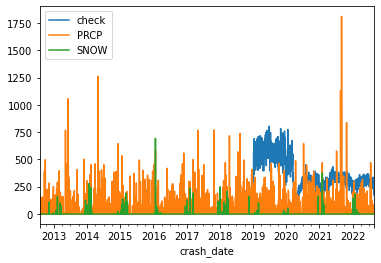

In [40]:
clima_crash.plot(x = 'crash_date')

In [41]:
clima_crash = clima_crash[(clima_crash['crash_date'] > "2019-01-01")]

<AxesSubplot:xlabel='crash_date'>

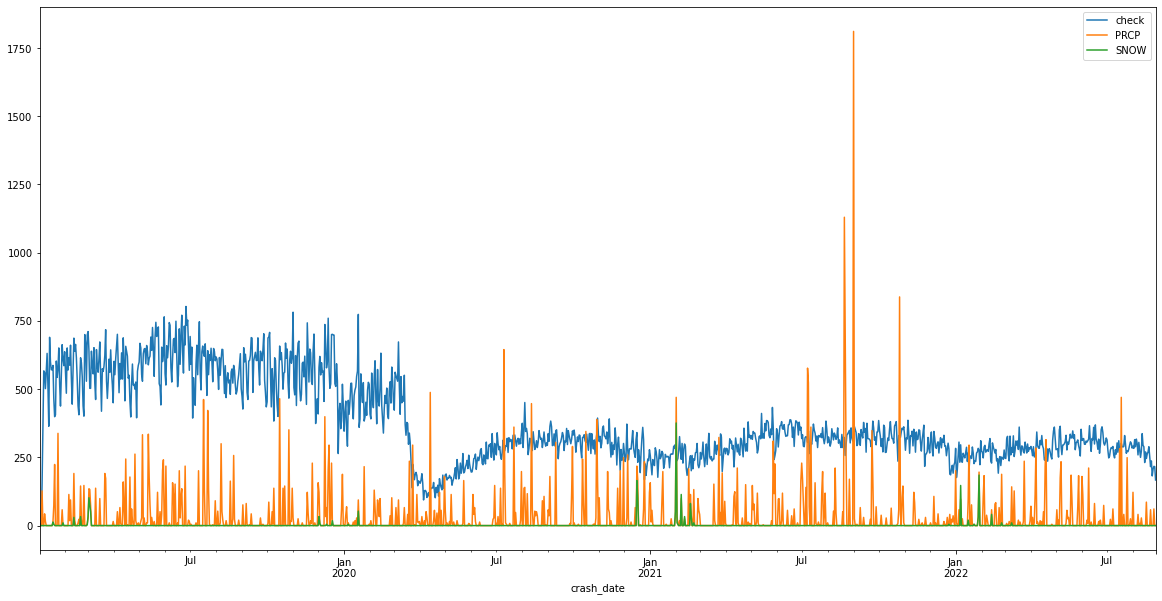

In [49]:
#clima_crash.drop(columns='PRCP').plot(x='crash_date')
clima_crash.plot(x='crash_date', figsize=(20, 10))

In [50]:
clima_crash.corr()

,check,PRCP,SNOW
check,1.000000,0.019544,-0.013051
PRCP,0.019544,1.000000,0.152814
SNOW,-0.013051,0.152814,1.000000


In [44]:
crash = crash[(crash['crash_date'] > "2019-01-01")]

In [52]:
crash

,crash_date,longitude,latitude,borough,check
0,2022-07-20,-73.890830,40.835808,NaN,1
1,2022-07-21,NaN,NaN,NaN,1
2,2021-04-14,NaN,NaN,NaN,1
3,2021-04-13,-73.976170,40.683580,BROOKLYN,1
4,2021-04-15,NaN,NaN,NaN,1
...,...,...,...,...,...
499995,2019-01-15,-73.870630,40.665092,BROOKLYN,1
499996,2019-01-31,-73.942230,40.689426,BROOKLYN,1
499997,2019-01-16,-73.924600,40.646640,BROOKLYN,1
499998,2019-01-22,-73.823524,40.756264,QUEENS,1


In [45]:
df_new = crash.drop(columns=['longitude','latitude']).groupby(['crash_date','borough']).sum()

<AxesSubplot:xlabel='crash_date', ylabel='check'>

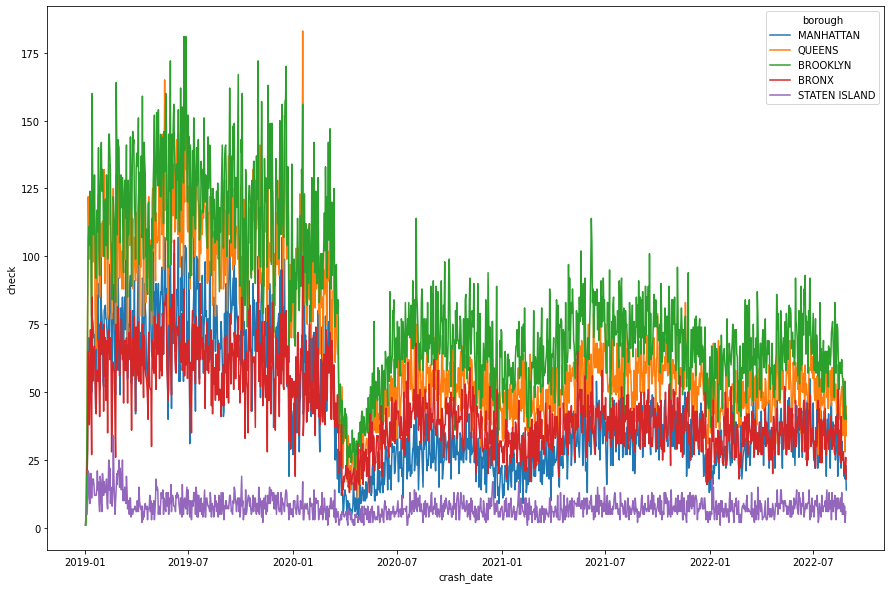

In [51]:
fig, ax = pyplot.subplots(figsize=(15, 10))
sbn.lineplot(x = 'crash_date', y='check',hue='borough', data=df_new)

In [47]:
crash.dropna().to_csv('crashes.csv')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

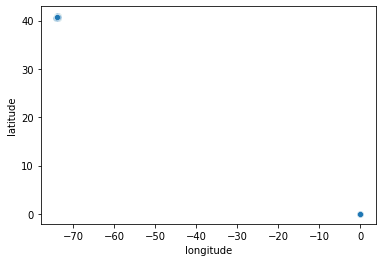

In [48]:
sbn.scatterplot(x='longitude', y='latitude',data=crash)